In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [68]:
num_example = 200
true_w = 2
true_b = 3
learning_rate = 0.01
display_step = 50

In [69]:
# 设置加噪音的数据
x_train = np.random.rand(num_example)
# print(x)
noise = np.random.rand(num_example)
output = x_train * true_w + true_b + noise

In [70]:
w_pre = tf.Variable(np.random.randn())
b_pre = tf.Variable(np.random.randn())
x = tf.placeholder(dtype=float,shape=[num_example])
y = tf.placeholder(dtype=float,shape=[num_example])

In [71]:
y_pre = tf.add(tf.multiply(x, w_pre), b_pre)
cost = tf.reduce_mean(tf.square(output-y_pre))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

第0训练的loss：26.01, w:-1.75, b:0.26
第50训练的loss：2.39, w:-0.18, b:3.11
第100训练的loss：0.43, w:0.34, b:3.89
第150训练的loss：0.25, w:0.55, b:4.08
第200训练的loss：0.22, w:0.67, b:4.11
第250训练的loss：0.20, w:0.77, b:4.08
第300训练的loss：0.19, w:0.85, b:4.05
第350训练的loss：0.18, w:0.92, b:4.01
第400训练的loss：0.16, w:0.99, b:3.98
第450训练的loss：0.15, w:1.05, b:3.95
第500训练的loss：0.14, w:1.11, b:3.92
第550训练的loss：0.14, w:1.17, b:3.89
第600训练的loss：0.13, w:1.22, b:3.86
第650训练的loss：0.12, w:1.27, b:3.84
第700训练的loss：0.12, w:1.32, b:3.81
第750训练的loss：0.11, w:1.37, b:3.79
第800训练的loss：0.11, w:1.41, b:3.77
第850训练的loss：0.10, w:1.45, b:3.75
第900训练的loss：0.10, w:1.48, b:3.73
第950训练的loss：0.10, w:1.52, b:3.72
第1000训练的loss：0.10, w:1.55, b:3.70
第1050训练的loss：0.09, w:1.58, b:3.68
第1100训练的loss：0.09, w:1.61, b:3.67
第1150训练的loss：0.09, w:1.63, b:3.66
第1200训练的loss：0.09, w:1.66, b:3.64
第1250训练的loss：0.09, w:1.68, b:3.63
第1300训练的loss：0.09, w:1.70, b:3.62
第1350训练的loss：0.08, w:1.72, b:3.61
第1400训练的loss：0.08, w:1.74, b:3.60
第1450训练的loss：0.08, w:1.76, b:3.59


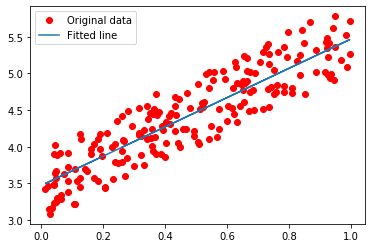

In [74]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(3000):
        sess.run(optimizer, feed_dict={x:x_train, y:output})
        # print(loss)
        if epoch%display_step ==0:
            losses = sess.run(cost, feed_dict={x:x_train, y:output})
            print("第%d训练的loss：%.2f, w:%.2f, b:%.2f" % (epoch, losses, sess.run(w_pre), sess.run(b_pre)))
    print("train finished")
    print("final loss:%.2f w_pre:%.2f b_pre:%2.f" %(sess.run(cost, feed_dict={x:x_train, y:output}),sess.run(w_pre), sess.run(b_pre)))
    print("true w:%d, true b:%d" %(true_w, true_b))
    plt.plot(x_train, output, 'ro', label='Original data')
    plt.plot(x_train, sess.run(w_pre) * x_train + sess.run(b_pre), label='Fitted line')
    plt.legend()
    plt.show()